#### Handling Skewed Dataset

Standardizing and Normalizing the feature values are not only enough for reforming the independant variables. In real life, it is assumed that randomly or naturally generalted samles are normally distributed. It might not be true for some datasets. In that case, we have transform the data into Gaussian distribution.

###### Skewed Dataset
If a statistical distribution curve of a dataset appears as distorted or skewed either to the left or to the right, it is called a skewed dataset. In a normal distribution(Gaussian distribution), the graph appears symmetry meaning that there are about as many data values on the left side of the median as on the right side. 

When the "long tail" is on the left side of the distribution, it is called negatively skewed. And if the tail is on the right side then it is a positively skewed dataset.

In this notebook we will use different techniques to transform feature values into Gaussian distributed data

In [75]:
# Importing necessary libraries

import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

In [28]:
# Loading the dataset

sales = pd.read_excel('sales.xls')

In [33]:
# Creating an overall report of the dataset to have an overview of it

sales_report_html = ProfileReport(sales, 
                              title='sales report',
                              explorative = True,
                              html={'style':{'full_width':True}})
sales_report_html

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We can see that the shipping cost can be a good candidate for the experiment as the mean is around 12 but the max value is more than 150. 

<AxesSubplot:ylabel='Frequency'>

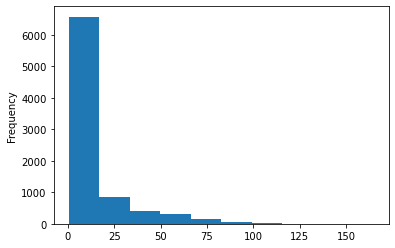

In [39]:
# To see visually, we can plot the distribution

sales['Shipping Cost'].plot.hist()

(array([6.575e+03, 8.590e+02, 4.180e+02, 3.260e+02, 1.530e+02, 4.200e+01,
        1.000e+01, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([  0.49 ,  16.914,  33.338,  49.762,  66.186,  82.61 ,  99.034,
        115.458, 131.882, 148.306, 164.73 ]),
 <BarContainer object of 10 artists>)

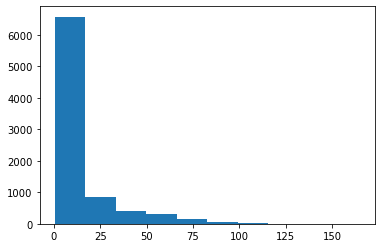

In [53]:
fig, axes = plt.subplots()
axes.hist(sales['Shipping Cost'])

In [89]:
# We can also use a Q-Q plot to see the distibution
# Creating a function to plot several times in the later parts of the scripts
def qqplot(df, var): 
    fig_sample, ax_sample = plt.subplots( nrows=1, ncols = 2, figsize = (12,5))
    ax_sample[0].hist(df[var])
    stats.probplot(df[var], dist = 'norm', plot = plt)


There are several ways for transforming the data. We will use some of them in the next steps.

###### Logarithmic transformation

In [106]:
# Transforming the data using logarithmic scale

sales['Shipping_Cost_Log'] = np.log(sales['Shipping Cost']+1)

<AxesSubplot:ylabel='Frequency'>

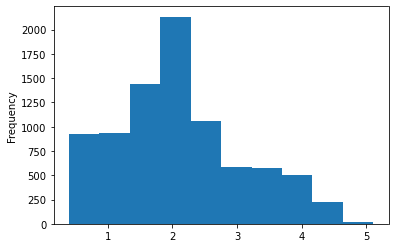

In [43]:
sales['Shipping_Cost_Log'].plot.hist()

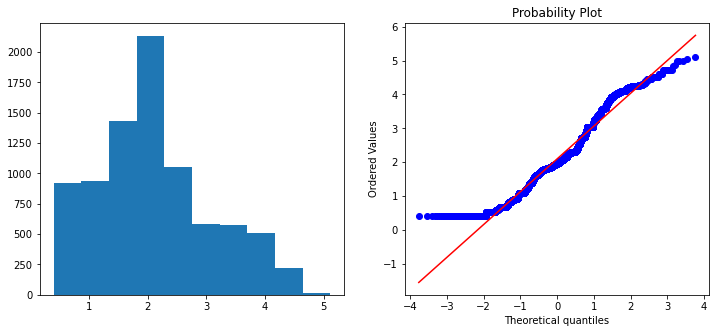

In [83]:
qqplot(sales, 'Shipping_Cost_Log')

In [90]:
# There are still many points which are out of the line in the probability distribution figure.
# This means the transformation is not satisfactoy

###### Reciprocal Transformation

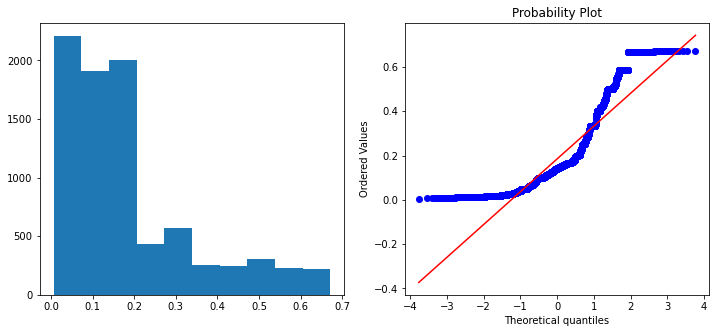

In [91]:
# Create another column to the dataset with the reciprocal transformed data

sales['Shipping_Cost_Rec'] = 1/(sales['Shipping Cost']+1)
qqplot(sales, 'Shipping_Cost_Rec')

In [92]:
# There are more points which are out of the line in the probability distribution figure.
# Actually it performed worse than logarithmic transformation

###### Square Root transformation 

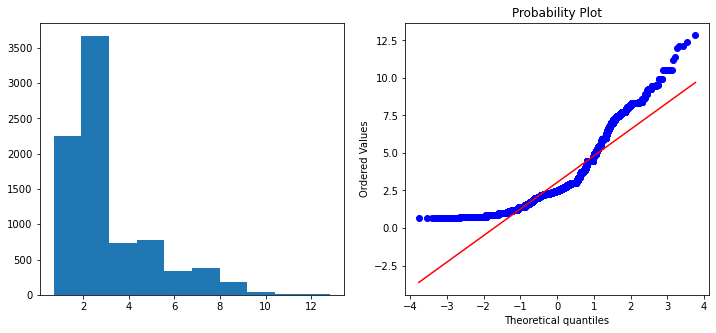

In [93]:
# Creating another column to the dataset with the square root transformed data
sales['Shipping_Cost_Sqrt'] = sales['Shipping Cost']**(1/2)
qqplot(sales, 'Shipping_Cost_Sqrt')

In [94]:
# The number of points which are out of the line in the probability dist. figure has further increased
# Tt performed worse than both logarithmic and reciprocal transformation 

###### BoxCox transformation

The value of optimal lambda is: -0.19500871588050306


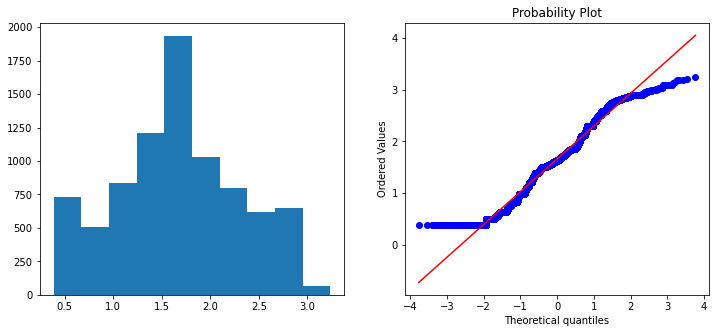

In [102]:
# It transforms the data as y = ((y**lambda) - 1)/lambda).
# The value of "lambda" is varied from -5 to 5 
# The “optimal value” is that which results in the best approximation of a normal distribution curve 
# But this transformation only works on the positive data, our data is positive

sales['Shipping_Cost_BoxCox'], lmbda = stats.boxcox(sales['Shipping Cost']+1)
print("The value of optimal lambda is:", lmbda)
qqplot(sales, 'Shipping_Cost_BoxCox')

In [99]:
# This time the result looks much better as most of the value points are on the pdf line

###### Johnson Transformation

The value of optimal lambda is: -0.34047709872577353


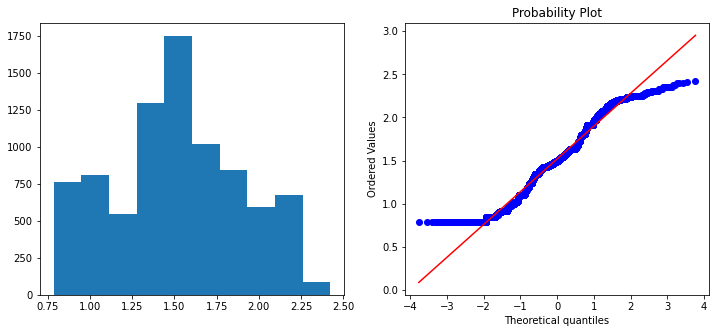

In [103]:
# Unlike BoxCox, Johnson transformation also works on negative data

sales['Shipping_Cost_Johnson'], parameter = stats.yeojohnson(sales['Shipping Cost']+1)
print("The value of optimal lambda is:", parameter)
qqplot(sales, 'Shipping_Cost_Johnson')

In [105]:
# The result is almost similar with the result found in boxcox transformation
# The optimal lambda values are also very close